In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import scipy.stats as stats
import plotly.express as px
from plotly import graph_objects as go
from scipy.stats import levene, mannwhitneyu, shapiro

In [2]:
google_play = pd.read_csv('D:/DANIEL PEQUEÑO OTOYA/3. Data Analysis/No Country/2. Proyecto/Google-Playstore.csv')

print(google_play.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [3]:
print(google_play.columns)

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')


In [4]:
#Cálculo de valores ausentes
print(google_play.isna().sum())

App Name                  5
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64


In [5]:
#Eliminamos todas las filas que contengan valores ausentes
google_play.dropna(inplace=True)
print(google_play.isna().sum())

App Name             0
App Id               0
Category             0
Rating               0
Rating Count         0
Installs             0
Minimum Installs     0
Maximum Installs     0
Free                 0
Price                0
Currency             0
Size                 0
Minimum Android      0
Developer Id         0
Developer Website    0
Developer Email      0
Released             0
Last Updated         0
Content Rating       0
Privacy Policy       0
Ad Supported         0
In App Purchases     0
Editors Choice       0
Scraped Time         0
dtype: int64


In [6]:
#Buscando duplicados
print(google_play.duplicated().sum())

0


In [7]:
#Usamos describe para revisar las categorias
print(google_play['Category'].unique())

['Adventure' 'Tools' 'Social' 'Personalization' 'Maps & Navigation'
 'Travel & Local' 'Food & Drink' 'Puzzle' 'Entertainment' 'Photography'
 'Health & Fitness' 'Shopping' 'Books & Reference' 'Beauty' 'Business'
 'Educational' 'Lifestyle' 'Music & Audio' 'News & Magazines'
 'Auto & Vehicles' 'Productivity' 'Education' 'Art & Design'
 'House & Home' 'Racing' 'Sports' 'Events' 'Finance' 'Weather' 'Board'
 'Medical' 'Communication' 'Word' 'Action' 'Trivia' 'Simulation'
 'Video Players & Editors' 'Music' 'Arcade' 'Libraries & Demo' 'Casual'
 'Dating' 'Strategy' 'Card' 'Role Playing' 'Casino' 'Parenting' 'Comics']


In [8]:
# Calculamos el número total de cada tipo de compra si es Free (True) de pago (False)
total_by_type_free = google_play['Free'].value_counts()
print(total_by_type_free)

Free
True     1263566
False      23625
Name: count, dtype: int64


In [9]:
# Calculamos los precios  mínimos y máximos de las apps
min_price = google_play['Price'].min()
max_price = google_play['Price'].max()

print(f"Precio mínimo: {min_price}")
print(f"Precio máximo: {max_price}")

Precio mínimo: 0.0
Precio máximo: 400.0


Vamos a tomar en cuenta solo los datos de los 3 últimos años, averiguaremos cual es el máximo valor y el mínimo valor de las fechas

In [17]:
# Transformo la columna 'Scraped Time' a formato datetime
google_play['Scraped Time'] = pd.to_datetime(google_play['Scraped Time'], errors='coerce')

min_date = google_play['Scraped Time'].min()
max_date = google_play['Scraped Time'].max()

print(f"Fecha mínimo: {min_date}")
print(f"Fecha máximo: {max_date}")

0   2021-06-15 20:19:35
1   2021-06-15 20:19:35
4   2021-06-15 20:19:35
5   2021-06-15 20:19:35
9   2021-06-15 20:19:35
Name: Scraped Time, dtype: datetime64[ns]
Fecha mínimo: 2021-06-15 20:19:35
Fecha máximo: 2021-06-16 15:10:42


In [13]:
#Las categorias con aplicaciones mas descargadas
category_installs = google_play.groupby('Category')['Minimum Installs'].sum()
category_installs = category_installs.sort_values(ascending=False)
print(category_installs.head(10))

Category
Tools                      5.061654e+10
Communication              3.757185e+10
Productivity               2.346740e+10
Video Players & Editors    1.700289e+10
Photography                1.605958e+10
Action                     1.554596e+10
Casual                     1.542717e+10
Entertainment              1.339329e+10
Arcade                     1.337176e+10
Music & Audio              1.163430e+10
Name: Minimum Installs, dtype: float64


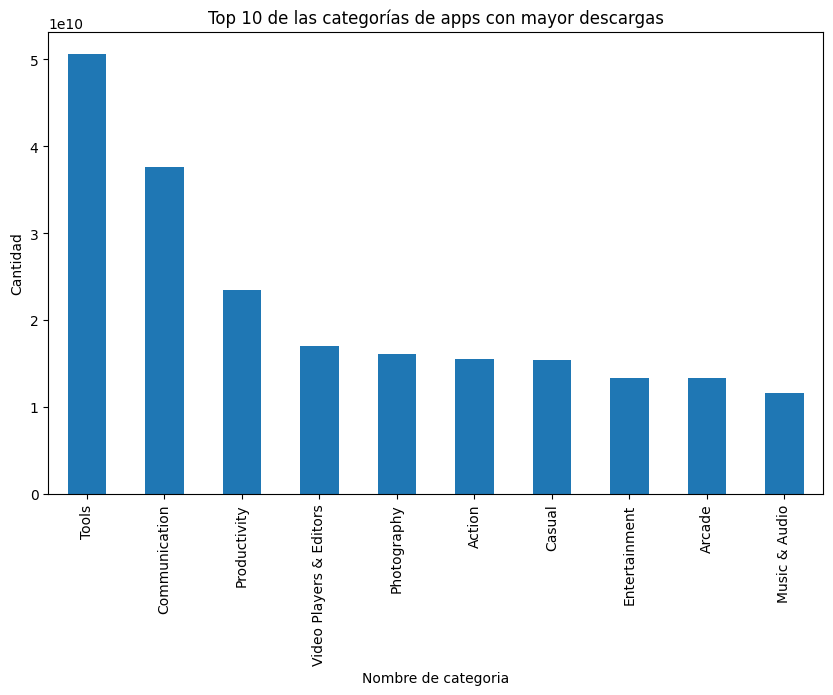

In [14]:
# Grafico de las categorias de aplicaciones con mas descargas
plt.figure(figsize=(10, 6))
category_installs.head(10).plot(kind='bar')
plt.title('Top 10 de las categorías de apps con mayor descargas')
plt.xlabel('Nombre de categoria')
plt.ylabel('Cantidad')
plt.show()

Ahora sabemos que las categorias de apps con mayor instalaciones son 'Tools', 'Communication' y 'Productivity', nuestra tarea es averiguar las aplicaciones dentro de estas categorias con rating = 5.0 y que tengan un precio mayor a $0.01

In [36]:
#Aseguramos que las columnas 'Rating' e 'Install' sean numéricas
google_play['Rating'] = pd.to_numeric(google_play['Rating'], errors='coerce')
google_play['Minimum Installs'] = pd.to_numeric(google_play['Minimum Installs'], errors='coerce')

#Cálculo de las apps con mayor rating y que sean de pago 
tools_paid_apps_with_max_rating = google_play[(google_play['Price'] > 0) & 
                                              (google_play['Rating'] == 5.0) & 
                                              (google_play['Category'] == 'Tools')]

# Ordeno por la columna 'Minimum Installs' en orden descendente y seleccionamos las primeras 10
tools_paid_apps_with_max_rating = tools_paid_apps_with_max_rating.sort_values(by='Minimum Installs', ascending=False).head(10)

# Eliminamos las columnas no deseadas del DataFrame
tools_paid_apps_with_max_rating = tools_paid_apps_with_max_rating.drop(['Rating Count', 'Maximum Installs', 'Scraped Time'], axis=1)

# Mostrar las apps que cumplen con las condiciones
print(tools_paid_apps_with_max_rating[['App Name', 'Minimum Installs', 'Rating', 'Price']])

                                                  App Name  Minimum Installs  \
102789                                    Sefira Reminders            1000.0   
317796                                       KeePassDX Pro            1000.0   
985303                                easy Pipe fitter Pro            1000.0   
982995                                         角度傾斜計（広告無し）            1000.0   
1303662                        ConcreteCalc Pro Calculator            1000.0   
1568786                                         EchoAccess            1000.0   
2179145  Electronics Plus Pro:Calculator,Datasheet,Lear...             500.0   
1060792                                 Coffee Roaster Pro             500.0   
2075165                                       Fake SMS Pro             100.0   
1610777                      Programmer Calculator Premium             100.0   

         Rating  Price  
102789      5.0   2.99  
317796      5.0  10.00  
985303      5.0   2.99  
982995      5.0   1

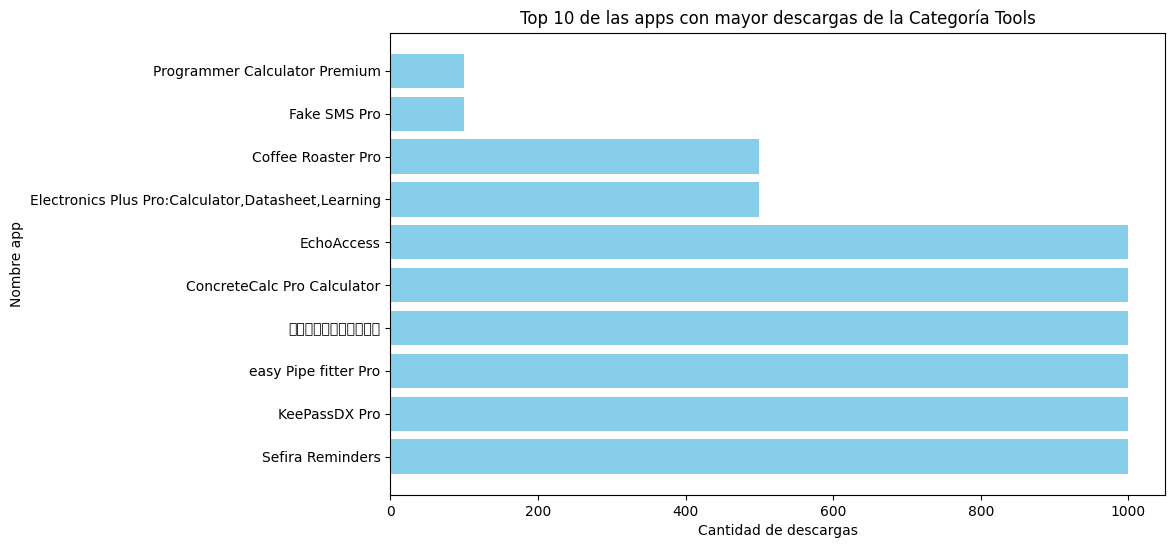

In [38]:
plt.figure(figsize=(10, 6))
plt.barh(tools_paid_apps_with_max_rating['App Name'], tools_paid_apps_with_max_rating['Minimum Installs'], color='skyblue')
plt.title('Top 10 de las apps con mayor descargas de la Categoría Tools')
plt.xlabel('Cantidad de descargas')
plt.ylabel('Nombre app')
plt.show()

    Las apps tienen entre 150 y 1000 descargas, hay 6 de ellas que llegan a 1000 e incluso superan las mil descargas.

In [48]:
#Ahora las multiplicamos por su precio para saber cuanto ganan cada una de ellas para la categoría tools
tools_paid_apps_with_max_rating['Earnings_Maximum Installs'] = tools_paid_apps_with_max_rating['Minimum Installs'] * tools_paid_apps_with_max_rating['Price']

tools_apps_earnings = tools_paid_apps_with_max_rating.groupby('App Name')['Earnings_Maximum Installs'].sum()
print(tools_apps_earnings)

App Name
Coffee Roaster Pro                                     1495.0
ConcreteCalc Pro Calculator                           24990.0
EchoAccess                                             2990.0
Electronics Plus Pro:Calculator,Datasheet,Learning      995.0
Fake SMS Pro                                            199.0
KeePassDX Pro                                         10000.0
Programmer Calculator Premium                           199.0
Sefira Reminders                                       2990.0
easy Pipe fitter Pro                                   2990.0
角度傾斜計（広告無し）                                            1610.0
Name: Earnings_Maximum Installs, dtype: float64


Ahora haremos el mismo procedimiento con la categoría Communication

In [39]:
#Cálculo de las apps con mayor rating y que sean de pago 
communication_paid_apps_with_max_rating = google_play[(google_play['Price'] > 0) & 
                                              (google_play['Rating'] == 5.0) & 
                                              (google_play['Category'] == 'Communication')]

# Ordeno por la columna 'Minimum Installs' en orden descendente y seleccionamos las primeras 10
communication_paid_apps_with_max_rating = communication_paid_apps_with_max_rating.sort_values(by='Minimum Installs', ascending=False).head(10)

# Eliminamos las columnas no deseadas del DataFrame
communication_paid_apps_with_max_rating = communication_paid_apps_with_max_rating.drop(['Rating Count', 'Maximum Installs', 'Scraped Time'], axis=1)

# Mostrar las apps que cumplen con las condiciones
print(communication_paid_apps_with_max_rating[['App Name', 'Minimum Installs', 'Rating', 'Price']])

                                                  App Name  Minimum Installs  \
1569604  WhatsMessage Pro - Chat n Call Without Number ...             100.0   
1740985             Cute Pocong Jump Stickers For WhatsApp              50.0   
1262972                                     TCP Server Pro              50.0   
473862                        Internet Connection Test Pro              10.0   
1415626  🎯 MomentSQ™: Aggretsuko Tic Tac Toe Sticker xYoki              10.0   

         Rating  Price  
1569604     5.0   1.49  
1740985     5.0   0.99  
1262972     5.0   3.49  
473862      5.0   0.99  
1415626     5.0   5.99  


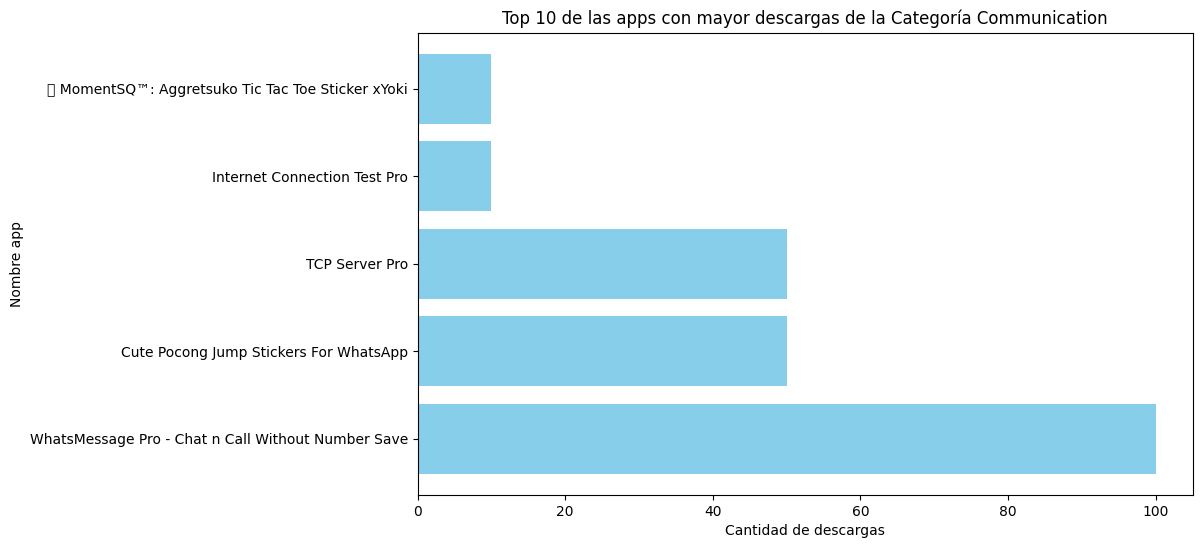

In [41]:
plt.figure(figsize=(10, 6))
plt.barh(communication_paid_apps_with_max_rating['App Name'], communication_paid_apps_with_max_rating['Minimum Installs'], color='skyblue')
plt.title('Top 10 de las apps con mayor descargas de la Categoría Communication')
plt.xlabel('Cantidad de descargas')
plt.ylabel('Nombre app')
plt.show()

Esta categoria de apps tienen menos cantidad de descargas, van entre las 15 y las 100 descargas.

In [50]:
#Ahora las multiplicamos por su precio para saber cuanto ganan cada una de ellas para la categoría communication
communication_paid_apps_with_max_rating['Earnings_Maximum Installs'] = communication_paid_apps_with_max_rating['Minimum Installs'] * communication_paid_apps_with_max_rating['Price']

communication_apps_earnings = communication_paid_apps_with_max_rating.groupby('App Name')['Earnings_Maximum Installs'].sum()
print(communication_apps_earnings)

App Name
Cute Pocong Jump Stickers For WhatsApp                 49.5
Internet Connection Test Pro                            9.9
TCP Server Pro                                        174.5
WhatsMessage Pro - Chat n Call Without Number Save    149.0
🎯 MomentSQ™: Aggretsuko Tic Tac Toe Sticker xYoki      59.9
Name: Earnings_Maximum Installs, dtype: float64


Ahora haremos el mismo procedimiento con la categoría Productivity

In [42]:
#Cálculo de las apps con mayor rating y que sean de pago 
productivity_paid_apps_with_max_rating = google_play[(google_play['Price'] > 0) & 
                                              (google_play['Rating'] == 5.0) & 
                                              (google_play['Category'] == 'Productivity')]

# Ordeno por la columna 'Minimum Installs' en orden descendente y seleccionamos las primeras 10
productivity_paid_apps_with_max_rating = productivity_paid_apps_with_max_rating.sort_values(by='Minimum Installs', ascending=False).head(10)

# Eliminamos las columnas no deseadas del DataFrame
productivity_paid_apps_with_max_rating = productivity_paid_apps_with_max_rating.drop(['Rating Count', 'Maximum Installs', 'Scraped Time'], axis=1)

# Mostrar las apps que cumplen con las condiciones
print(productivity_paid_apps_with_max_rating[['App Name', 'Minimum Installs', 'Rating', 'Price']])

                                             App Name  Minimum Installs  \
771566                                Calculator Plus          100000.0   
1905652                           ProjectCalc Classic             100.0   
615532                                        CowCalf             100.0   
824776                     Dry Mix Composition ADFREE             100.0   
377110                                        CalPad+              50.0   
1419349                       Fast keyboard (Russian)              50.0   
465071                                        Q-diary              10.0   
789309                  URL SHORTENER - Made in India              10.0   
2293456  Productivity Motivation - Be More Productive               5.0   

         Rating  Price  
771566      5.0   2.99  
1905652     5.0   9.99  
615532      5.0  14.99  
824776      5.0   3.49  
377110      5.0   0.99  
1419349     5.0   2.49  
465071      5.0   3.99  
789309      5.0   0.99  
2293456     5.0   1.99  

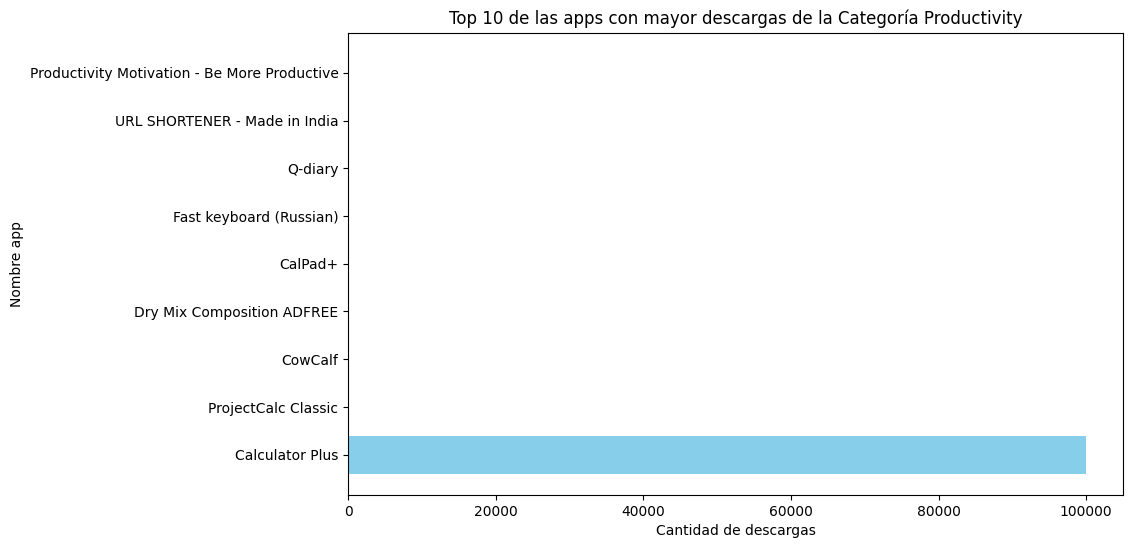

In [44]:
plt.figure(figsize=(10, 6))
plt.barh(productivity_paid_apps_with_max_rating['App Name'], productivity_paid_apps_with_max_rating['Minimum Installs'], color='skyblue')
plt.title('Top 10 de las apps con mayor descargas de la Categoría Productivity')
plt.xlabel('Cantidad de descargas')
plt.ylabel('Nombre app')
plt.show()

En esta categoría tenemos una peculiaridad, ya que la mayoría de apps varian entre las 50 y 200 descargas, pero la app 'Calculator Plus' tiene mas de 1000 descargas

In [51]:
#Ahora las multiplicamos por su precio para saber cuanto ganan cada una de ellas para la categoría productivity
productivity_paid_apps_with_max_rating['Earnings_Maximum Installs'] = productivity_paid_apps_with_max_rating['Minimum Installs'] * productivity_paid_apps_with_max_rating['Price']

productivity_paid_apps_with_max_rating_apps_earnings = productivity_paid_apps_with_max_rating.groupby('App Name')['Earnings_Maximum Installs'].sum()
print(productivity_paid_apps_with_max_rating_apps_earnings)

App Name
CalPad+                                             49.50
Calculator Plus                                 299000.00
CowCalf                                           1499.00
Dry Mix Composition ADFREE                         349.00
Fast keyboard (Russian)                            124.50
Productivity Motivation - Be More Productive         9.95
ProjectCalc Classic                                999.00
Q-diary                                             39.90
URL SHORTENER - Made in India                        9.90
Name: Earnings_Maximum Installs, dtype: float64


In [52]:
#Construiremos histogramas y una matriz de correlacion, esto permitirá ver si hay algún valor atípico y examinar cómo se comportan las características.

#1. Histograma
#Seleccionamos solo columnas numéricas
numeric_df = google_play.select_dtypes(include=['float64', 'int64']).drop('Rating Count', axis=1)


#Verificamos que el dataframe tenga datos
print(numeric_df.head())

   Rating  Installs  Minimum Installs  Maximum Installs  Price
0     0.0      10.0              10.0                15    0.0
1     4.4    5000.0            5000.0              7662    0.0
4     0.0     100.0             100.0               478    0.0
5     0.0      50.0              50.0                89    0.0
9     4.7   50000.0           50000.0             62433    0.0


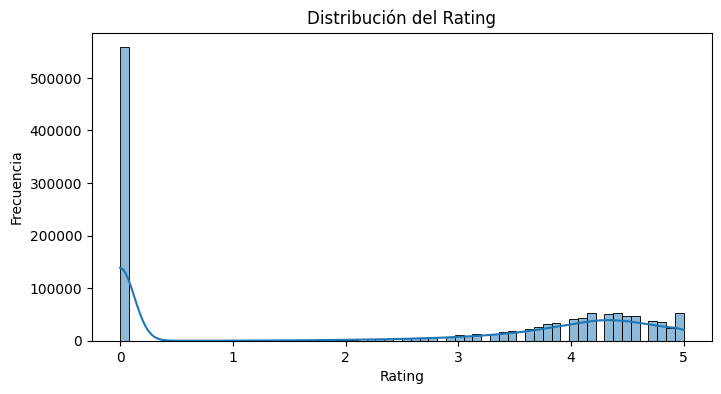

In [53]:

# Histograma para la columna 'Rating'
plt.figure(figsize=(8, 4))
sns.histplot(numeric_df['Rating'], kde=True)
plt.title('Distribución del Rating')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()


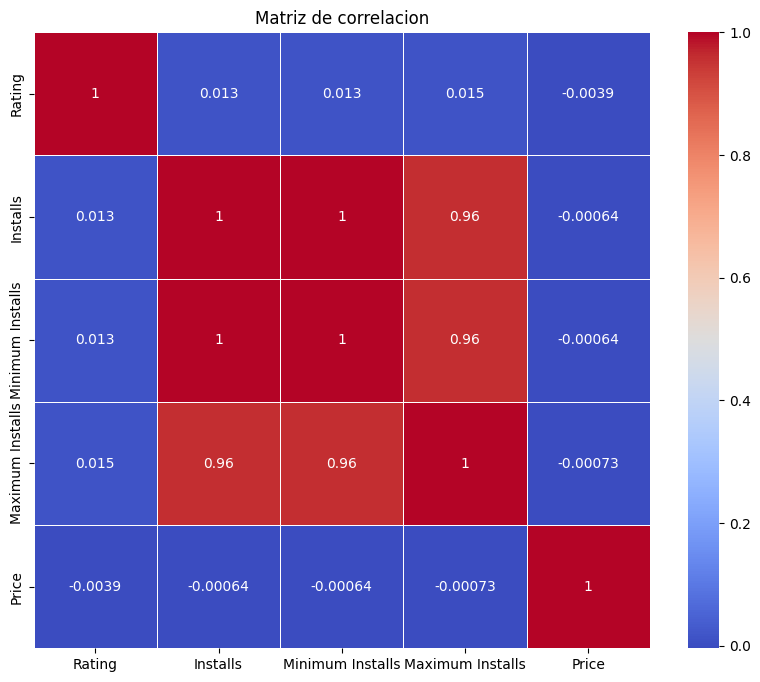

In [ ]:
#2. Matriz de correlación y mapa de calor
#Construimos la matriz de correlacion
cm = numeric_df.corr()

#Mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, square=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlacion')
plt.show()

No se observa ningún sesgo o valor atípico en el mapa de calor.

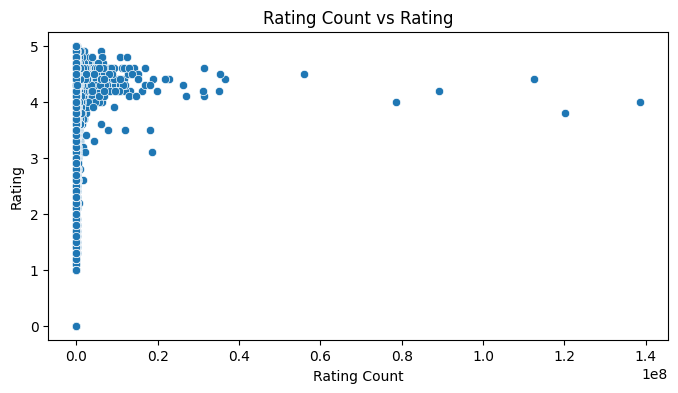

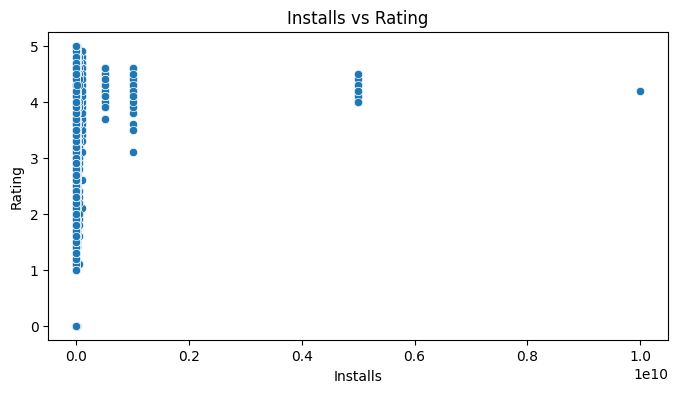

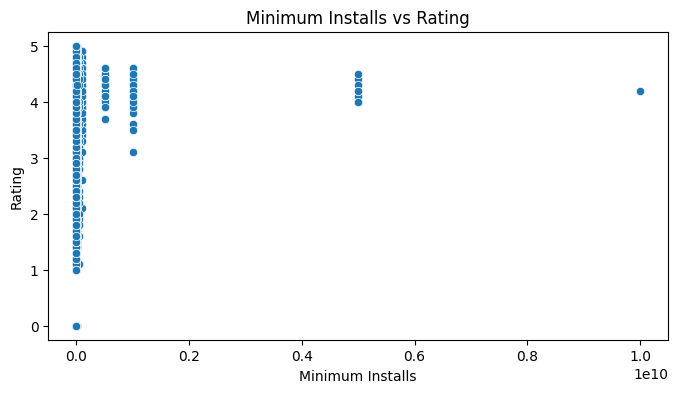

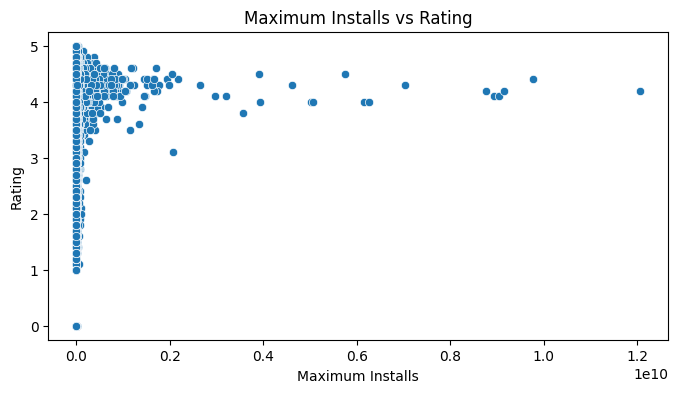

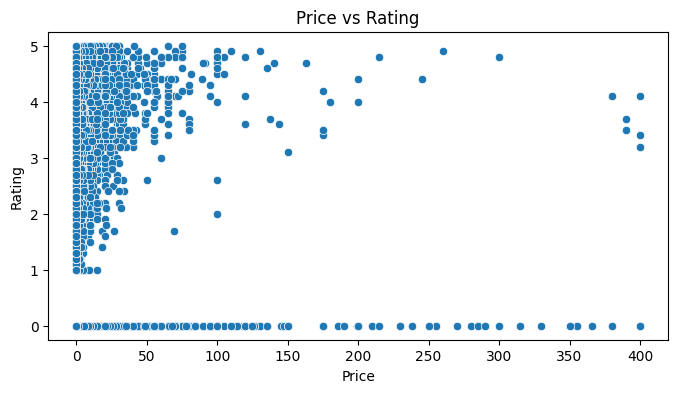

In [ ]:
#3. Trazo de scatter plots para cada caracteristica vs 'Raiting'
for col in google_play.drop('Rating', axis=1).select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=google_play[col], y=google_play['Rating'])
    plt.title(f'{col} vs Rating')
    plt.xlabel(col)
    plt.ylabel('Rating')
    plt.show()

De los gráficos deducimos que las aplicaciones con mayor cantidad de 'descargas' y 'rating' varian entre los $0.00 y los $25.00.